In [2]:
!python -m pip install sklearn statsmodels

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import display, HTML

In [4]:
plt.rcParams["figure.figsize"] = (12,10)

,w/N,⟨ψ(bar)ψ⟩
0,0.125000,-0.239119
1,0.083333,-0.239521
2,0.062500,-0.237859
3,0.050000,-0.236378
4,0.041667,-0.235556
5,0.035714,-0.234696


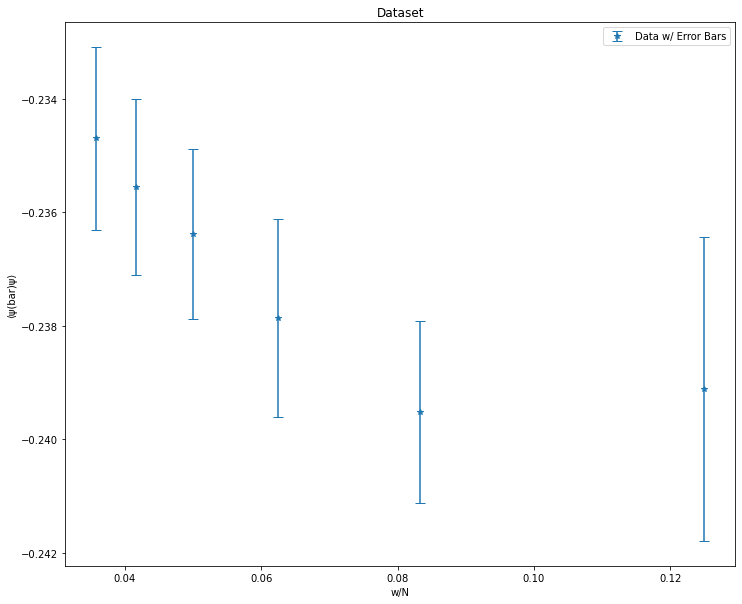

In [5]:
x_data = np.array([0.125, 0.08333333333333333, 
                   0.0625, 
                   0.05, 
                   0.041666666666666664, 
                   0.03571428571428571])
y_data = np.array([-0.23911894987506038, 
                   -0.2395207628740405, 
                   -0.23785917474471302, 
                   -0.23637765033965558,
                   -0.23555598888423035, 
                   -0.2346960333464121])

err_bars = np.array([0.0026775240437769965, 
                     0.0015978480235485926, 
                     0.0017480720891312335, 
                     0.0014988649046950853,
                     0.0015567241713362184, 
                     0.0016137955389433495])
                     
size = x_data.size
df_data = pd.DataFrame({'w/N': x_data, '⟨ψ(bar)ψ⟩': y_data})
display(df_data)

# Plot data w/ error bars
plt.errorbar(x_data, y_data, yerr=err_bars, label='Data w/ Error Bars', linestyle='None', marker='*', capsize=5)
plt.title('Dataset')
plt.xlabel('w/N')
plt.ylabel('⟨ψ(bar)ψ⟩')
plt.legend()
plt.show()

In [6]:
# Define models

# Define linear model of the form: mx + c
def linear(x, m, c):
    return m*x + c

# Define quadratic model of the form: ax^2 + bx +_ c
def quadratic(x, a, b, c):
    return a*np.square(x) + b*x + c

# Define exponential model of the form: a + e^(bx -c)
def exponential(x, a, b, c):
    return a + np.exp((x*b)-c) # unsure why y=a+b*np.exp(-x*c) always produces a linear model

In [7]:
# curve_fit returns parameters, covariance
# parameters contains the optimal coefficients
# for the different curves
lin_params, _ = curve_fit(linear, x_data, y_data)
quad_params, _ = curve_fit(quadratic, x_data, y_data)
exp_params, _ = curve_fit(exponential, x_data, y_data)

# Get fitted values of m and c for the linear model
lin_fit_m = lin_params[0]
lin_fit_c = lin_params[1]

# Get fitted values of a, b and c for the quadratic model
quad_fit_a = quad_params[0]
quad_fit_b = quad_params[1]
quad_fit_c = quad_params[2]

# Get fitted values of a, b and c for the exponential model
exp_fit_a = exp_params[0]
exp_fit_b = exp_params[1]
exp_fit_c = exp_params[2]

Linear: y = (-0.05040470830441562)x + -0.23384278085718985
Quadratic:  y = (1.174406975816242)x^2 + (-0.2397000252298984)x + -0.22754045208287438
Exponential: y = -0.239615837534136 + e^((-40.53967267102532)x - 3.8304203190072252)


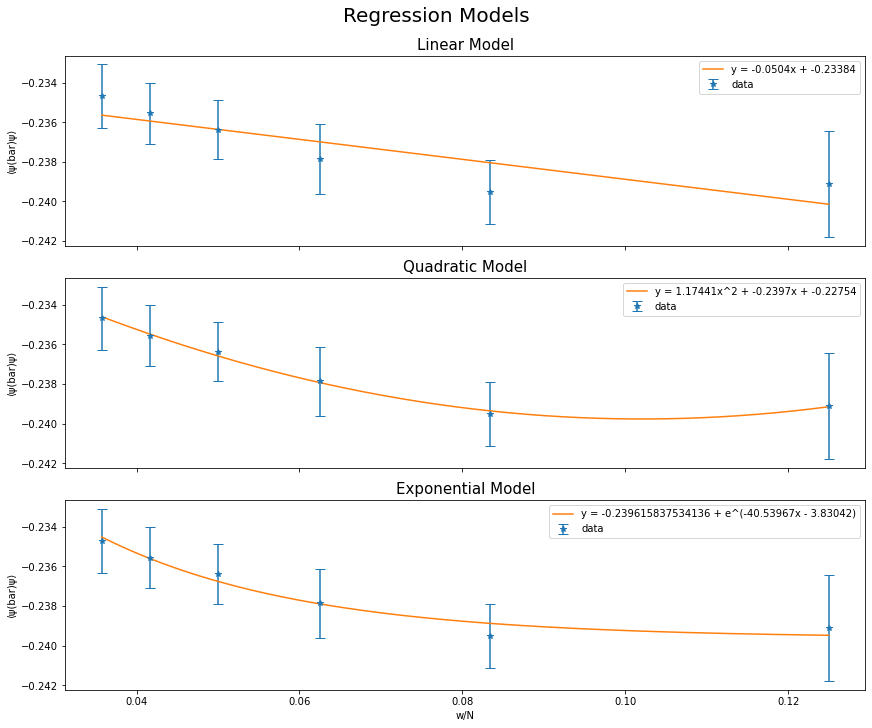

In [10]:
# Plot models
fig, axs = plt.subplots(3, sharex=True, constrained_layout=True)
fig.suptitle('Regression Models', fontsize=20)

# Plot data and linear model
# Predicting the y-values using the x-values given
lin_fit_y = linear(x_data, lin_fit_m, lin_fit_c)
axs[0].set_title('Linear Model', fontsize=15)
axs[0].errorbar(x_data, y_data, yerr=err_bars, linestyle='None', marker='*', label='data', capsize=5)
axs[0].plot(x_data, lin_fit_y, '-', label=f'y = {round(lin_fit_m,5)}x + {round(lin_fit_c,5)}')

# Plot data and quadratic model
# Predicting the y-values using the x-values given
quad_fit_y = quadratic(x_data, quad_fit_a, quad_fit_b, quad_fit_c)

# Using our quadratic model, we are going to predict the values
# of y for 1000 different values of x, within the range of the original dataset,
# this is so that the quadratic can be a smooth curve when plotted
new_x_data = np.linspace(x_data[0], x_data[-1], 1000)
new_quad_fit_y = quadratic(new_x_data, quad_fit_a, quad_fit_b, quad_fit_c)

axs[1].set_title('Quadratic Model', fontsize=15)
axs[1].errorbar(x_data, y_data, yerr=err_bars, linestyle='None', marker='*', label='data', capsize=5)
axs[1].plot(new_x_data, new_quad_fit_y, '-', label=f'y = {round(quad_fit_a,5)}x^2 + {round(quad_fit_b,5)}x + {round(quad_fit_c,5)}')


# Plot data and exponential model
# Predicting our y-values using the x-values given
exp_fit_y = exponential(x_data, exp_fit_a, exp_fit_b, exp_fit_c)

# Using our exponential model, we are going to predict the values
# of y for 1000 different values of x, within the range of the original dataset,
# this is so that the exponential can be a smooth curve
new_exp_fit_y = exponential(new_x_data, exp_fit_a, exp_fit_b, exp_fit_c)

axs[2].set_title('Exponential Model', fontsize=15)

axs[2].errorbar(x_data, y_data, yerr=err_bars, linestyle='None', marker='*', label='data', capsize=5)
axs[2].plot(new_x_data, new_exp_fit_y, '-', label=f'y = {exp_fit_a} + e^({round(exp_fit_b,5)}x - {round(exp_fit_c,5)})')

for ax in axs.flat:
    ax.set(xlabel='w/N', ylabel='⟨ψ(bar)ψ⟩')
    ax.legend()
    ax.label_outer()

print(f'Linear: y = ({lin_fit_m})x + {lin_fit_c}')
print(f'Quadratic:  y = ({quad_fit_a})x^2 + ({quad_fit_b})x + {quad_fit_c}')
print(f'Exponential: y = {exp_fit_a} + e^(({exp_fit_b})x - {exp_fit_c})')

In [11]:
# Calculating the value of various goodness measures
lin_measures = {}
quad_measures = {}
exp_measures = {}

# Need to implement more goodness measures
index = ['R^2', 'Adjusted R^2']

# R^2
lin_measures['r2'] = r2_score(y_data, lin_fit_y)
quad_measures['r2'] = r2_score(y_data, quad_fit_y)
exp_measures['r2'] = r2_score(y_data, exp_fit_y)

# adjusted R^2, using our values of R^2
lin_measures['adj_r2'] = 1-(1-lin_measures['r2'])*((size-1)/(size-1-1))
quad_measures['adj_r2'] = 1-(1-quad_measures['r2'])*((size-1)/(size-2-1))
exp_measures['adj_r2'] = 1-(1-exp_measures['r2'])*((size-1)/(size-2-1))



# # Standard Error - Not implemented as was not outputting values expected
# will need to look into this
# lin_measures['se'] = np.std(lin_fit_y)/np.sqrt(np.size(x_data))
# quad_measures['se'] = np.std(quad_fit_y)/(size**0.5)
# exp_measures['se'] = np.std(exp_fit_y)/(size**0.5)


# I am not fond of this method of generating the data frame as it relies on the
# fact that python dicts have an ordered representation, which is an implementation choice,
# rather than an inherent property of the dict data structure
df_goodness = pd.DataFrame({'Linear': [lin_measures[k] for k in lin_measures.keys()],
                            'Quadratic': [quad_measures[k] for k in quad_measures.keys()],
                            'Exponential': [exp_measures[k] for k in exp_measures.keys()]}, index=index)
display(df_goodness)

,Linear,Quadratic,Exponential
R^2,0.737377,0.995268,0.962054
Adjusted R^2,0.671721,0.992114,0.936756


### Results Breakdown and Analysis
The $R^2$ goodness measure reveals how much the independent parameter determines variance in the dependent parameter. The adjusted $R^2$ goodness measure takes into account the number of 'features', or in this case the {a,b,c,m} terms. The adjusted $R^2$ value will always be less than the $R^2$ value.
We can see that using this measure of goodness of fit, the quadratic model performs the best on our training data.

In the quadratic model, there is a slight decrease from $R^2$ to adjusted $R^2$, suggesting that we are using an appropriate power of x. On the other hand, the exponential model sees a decrease of 0.3, suggesting that one or more of the a, b and c terms improve the model by less than expected.
In other words, the a, b and c terms in the quadratic model have a greater contribution to the model's overall performance than those of the exponential model.
The linear model performs the worst by all goodness measures in the table, which is to be expected as the dataset is not linear, and this can also been deduced by inspecting the linear graph and comparing it to the other two.

### MyCurveFit
See below for a greater range of goodness measures (note that values for $R^2$ and adj. $R^2$ may differ slightly due to early rounding on MyCurveFit I believe):
### Linear Model
![title](Linear_Regression_Model.png)

### Quadratic Model
![title](Quadratic_Regression_Model.png)

### Exponential Model
![title](Exponential_Regression_Model.png)
